In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv("/content/drive/MyDrive/heart disease/heart.csv")

In [3]:
dataset

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [5]:
dataset.keys()

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [6]:
dataset.shape

(918, 12)

In [7]:
import numpy as np

In [8]:
# type(dataset)

In [8]:
dataset.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [9]:
dataset.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [10]:
# remove data with '?'

dataset = dataset[~dataset.isin(['?'])]

In [11]:
# remove data with nan value

dataset = dataset.dropna(axis=0)
# dataset.loc[280:]

In [12]:
print(np.unique(dataset.Sex))
print(np.unique(dataset.ChestPainType))
print(np.unique(dataset.RestingECG))
print(np.unique(dataset.ExerciseAngina))
print(np.unique(dataset.ST_Slope))

['F' 'M']
['ASY' 'ATA' 'NAP' 'TA']
['LVH' 'Normal' 'ST']
['N' 'Y']
['Down' 'Flat' 'Up']


In [13]:
data = pd.get_dummies(dataset, columns = ['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope'])

In [14]:
data

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,0,1,0,...,0,1,0,1,0,1,0,0,1,0
914,68,144,193,1,141,3.4,1,0,1,1,...,0,0,0,1,0,1,0,0,1,0
915,57,130,131,0,115,1.2,1,0,1,1,...,0,0,0,1,0,0,1,0,1,0
916,57,130,236,0,174,0.0,1,1,0,0,...,0,0,1,0,0,1,0,0,1,0


In [15]:
data.drop(['Sex_F','ExerciseAngina_N','ST_Slope_Down','RestingECG_LVH','ChestPainType_NAP'], axis=1, inplace=True)


In [16]:
data

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,0,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,0,1,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,1,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,1,0,0,1,1,0,0,1,0
914,68,144,193,1,141,3.4,1,1,1,0,0,1,0,0,1,0
915,57,130,131,0,115,1.2,1,1,1,0,0,1,0,1,1,0
916,57,130,236,0,174,0.0,1,0,0,1,0,0,0,0,1,0


In [18]:
from matplotlib import pyplot as plt

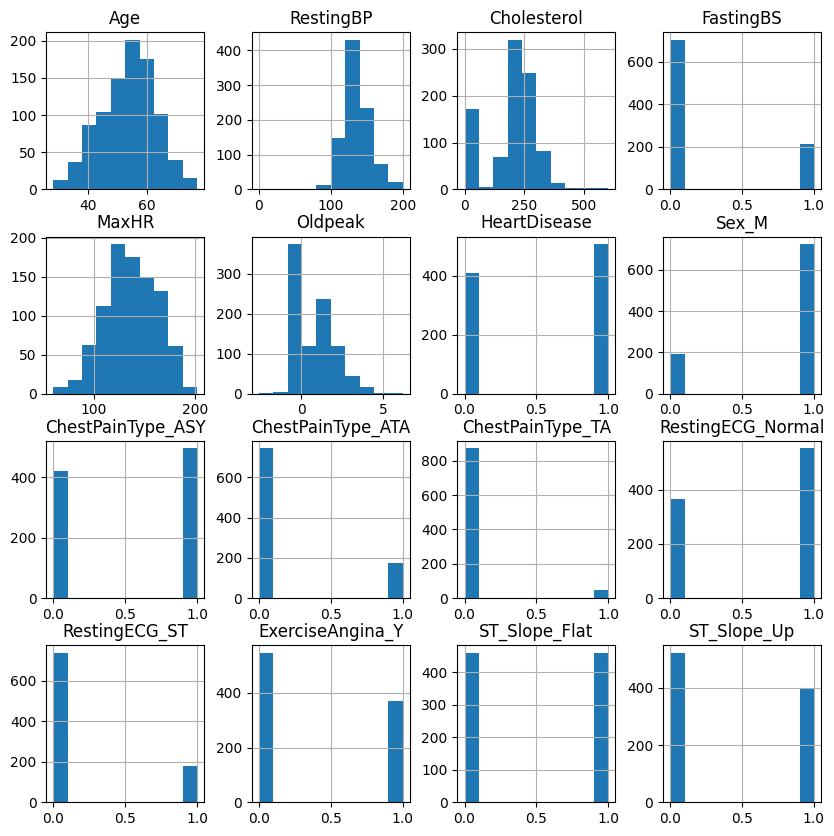

In [19]:
data.hist(figsize = (10, 10))
plt.show()

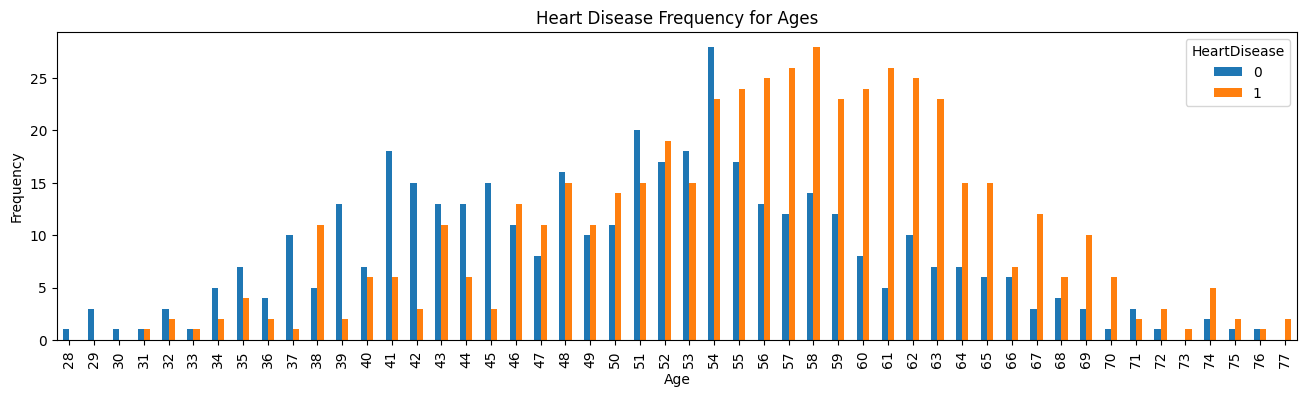

In [20]:
pd.crosstab(data.Age,data.HeartDisease).plot(kind="bar",figsize=(16,4))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [21]:
x = np.array(data.drop(['HeartDisease'],1))
y = np.array(data['HeartDisease'])

<ipython-input-21-a5fb04f354e5>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = np.array(data.drop(['HeartDisease'],1))


In [22]:
np.unique(y)

array([0, 1])

In [40]:
# data = data.apply(pd.to_numeric)
# data.dtypes

In [23]:
mean = x.mean(axis=0)
x -= mean
std = x.std(axis=0)
x /= std

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size = 0.2)

In [26]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(734, 15)
(734,)
(184, 15)
(184,)


In [27]:
from keras.utils.np_utils import to_categorical

In [28]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [29]:
print(y_train.shape)
print(y_test.shape)

(734, 2)
(184, 2)


**Model : Neural Network**

In [30]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import Adam

In [31]:
def create_model():
  model = Sequential()
  model.add(Dense(64, input_dim=15, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(32, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(16,activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(8,activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(4, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(2,activation='sigmoid'))

  adam = Adam(lr=0.001)
  model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
  return model

In [32]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1024      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_3 (Dense)             (None, 8)                 1

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [33]:
type(model)

keras.engine.sequential.Sequential

In [34]:
batch_size = 20
epochs = 100

In [35]:
training = model.fit(x_train,
                    y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    validation_data =(x_test,y_test))

Epoch 1/100
37/37 [==============================] - 2s 11ms/step - loss: 0.8711 - accuracy: 0.4837 - val_loss: 0.6804 - val_accuracy: 0.5924
Epoch 2/100
37/37 [==============================] - 0s 4ms/step - loss: 0.7510 - accuracy: 0.5327 - val_loss: 0.6791 - val_accuracy: 0.5978
Epoch 3/100
37/37 [==============================] - 0s 4ms/step - loss: 0.7131 - accuracy: 0.5450 - val_loss: 0.6795 - val_accuracy: 0.5815
Epoch 4/100
37/37 [==============================] - 0s 4ms/step - loss: 0.7034 - accuracy: 0.5381 - val_loss: 0.6788 - val_accuracy: 0.5815
Epoch 5/100
37/37 [==============================] - 0s 4ms/step - loss: 0.7090 - accuracy: 0.5354 - val_loss: 0.6771 - val_accuracy: 0.5815
Epoch 6/100
37/37 [==============================] - 0s 4ms/step - loss: 0.6943 - accuracy: 0.5463 - val_loss: 0.6743 - val_accuracy: 0.5815
Epoch 7/100
37/37 [==============================] - 0s 5ms/step - loss: 0.6826 - accuracy: 0.5545 - val_loss: 0.6692 - val_accuracy: 0.5815
Epoch 8/100


In [36]:
score = model.evaluate(x_test, y_test, verbose = 0)
# test loss and test accuracy
score

[0.3206193745136261, 0.875]

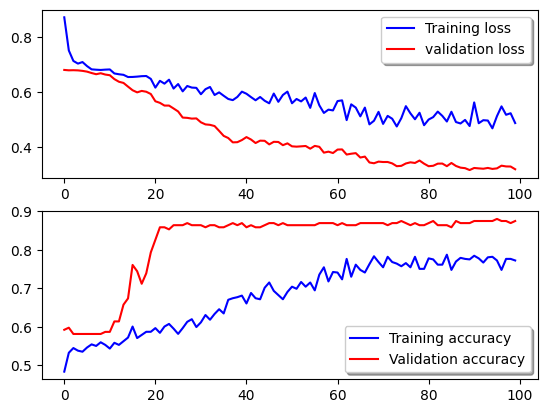

In [37]:
# model accuracy and loss
fig, ax = plt.subplots(2,1)
ax[0].plot(training.history['loss'], color='b', label="Training loss")
ax[0].plot(training.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(training.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(training.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [38]:
label = ['false','true']

In [39]:
result = model.predict([[40,250,250,0,255,0.0,0,0,0,0,0,0,0,0,0]])

1/1 [==============================] - 0s 159ms/step


In [ ]:
# print(result)
# print(result[0][0])

In [41]:
ind = 0
if(result[0][0] < result[0][1]):
  ind = 1
label[ind]

'true'

In [42]:
import pickle

pickle.dump(model,open('model.pkl','wb'))

**Model : Random Forest**

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# m=RandomForestClassifier()
# m.fit(x_train,y_train)
# m.score(x_test,y_test)